# Atividade 01

In [88]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [89]:
# Função para suprimir todos os FutureWarnings
def suprimir_warnings_futuros():
    warnings.simplefilter(action='ignore', category=FutureWarning)

# Chamada para a função que suprime FutureWarnings
suprimir_warnings_futuros()

In [90]:
# Função para carregar e limpar os dados, substituindo valores infinitos por NaN
def carregar_e_limpar_dados(caminho_arquivo):
    # Carrega os dados do arquivo CSV
    dados = pd.read_csv(caminho_arquivo)
    
    # Substitui valores infinitos por NaN
    dados.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    return dados

# Carrega e limpa os dados do arquivo 'previsao_de_renda.csv'
dados = carregar_e_limpar_dados('previsao_de_renda.csv')

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de correlação" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

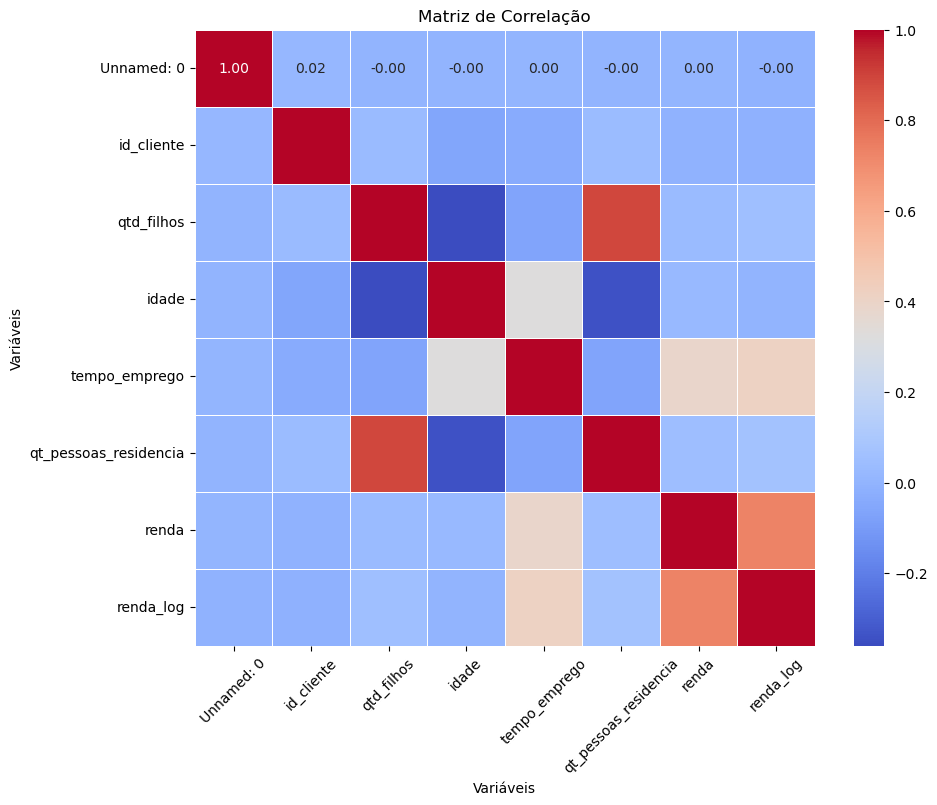

In [98]:
# Obtém as variáveis quantitativas do DataFrame
variaveis_quantitativas = dados.select_dtypes(include=['float64', 'int64']).columns

# Função para plotar um heatmap para a matriz de correlação
def plotar_heatmap(matriz_correlacao):
    # Configura o tamanho da figura
    plt.figure(figsize=(10, 8))
    
    # Utiliza seaborn para gerar um heatmap da matriz de correlação
    sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    
    # Adiciona título ao gráfico
    plt.title('Matriz de Correlação')
    
    # Adiciona rótulos aos eixos
    plt.xlabel('Variáveis')
    plt.ylabel('Variáveis')
    
    # Ajusta a posição dos rótulos
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Exibe o gráfico
    plt.show()

# Calcula a matriz de correlação usando as variáveis quantitativas do DataFrame
matriz_correlacao = dados[variaveis_quantitativas].corr()

# Chama a função para plotar o heatmap
plotar_heatmap(matriz_correlacao)

- renda, tempo_emprego e idade são as variaveis com maior corelação. O que faz sentido em muitos  aspectos.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

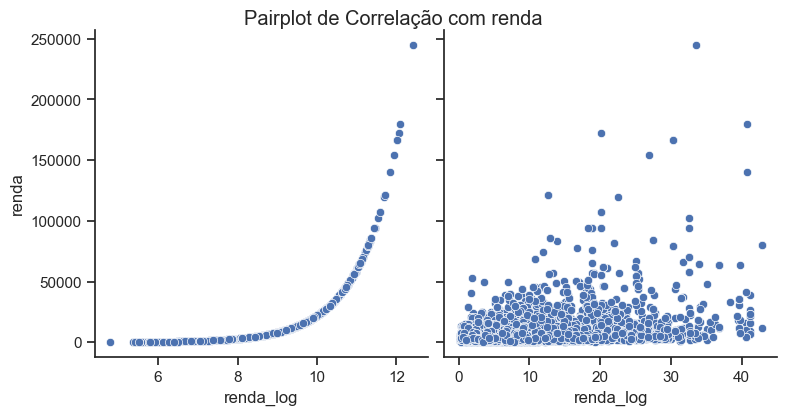

In [100]:
# Obtém as variáveis mais correlacionadas com 'renda' a partir da matriz de correlação
correlacoes_principais = matriz_correlacao['renda'].sort_values(ascending=False).index[1:3]

# Função para plotar um pairplot para as variáveis mais correlacionadas com a variável alvo
def plotar_pairplot_correlacao(dados, correlacoes_principais, variavel_alvo):
    # Utiliza seaborn para gerar um pairplot das variáveis mais correlacionadas com a variável alvo
    sns.set(style="ticks")
    g = sns.pairplot(dados, x_vars=correlacoes_principais, y_vars=variavel_alvo, kind='scatter', height=4)
    
    # Adiciona título ao pairplot
    plt.suptitle(f'Pairplot de Correlação com {variavel_alvo}', y=1.02)
    
    # Ajusta rótulos dos eixos
    g.set(xlabel=correlacoes_principais[0], ylabel=variavel_alvo)
    
    # Exibe o gráfico
    plt.show()

# Chama a função para plotar o pairplot de correlação
plotar_pairplot_correlacao(dados, correlacoes_principais, 'renda')

3) Na sua opinião, há outliers na variável renda?

Sim.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

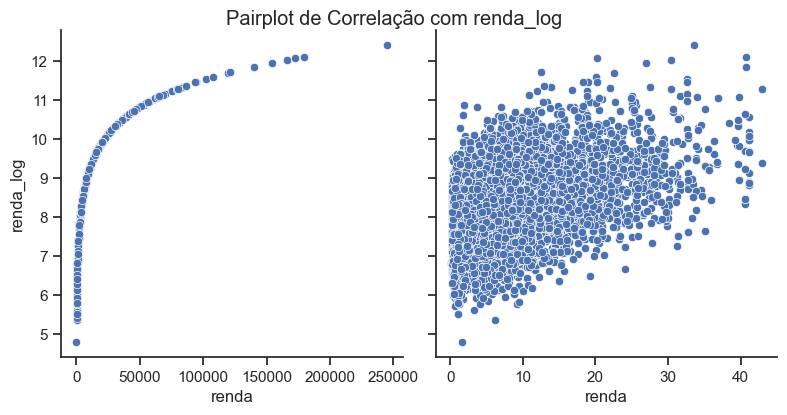

In [102]:
# Calcula o logaritmo da variável 'renda'
dados['renda_log'] = np.log1p(dados['renda'])

# Obtém as variáveis quantitativas, incluindo 'renda_log'
variaveis_quantitativas = dados.select_dtypes(include=['float64', 'int64']).columns

# Calcula a matriz de correlação usando as variáveis quantitativas do DataFrame
matriz_correlacao = dados[variaveis_quantitativas].corr()

# Obtém as variáveis mais correlacionadas com 'renda_log' a partir da matriz de correlação
correlacoes_principais_log = matriz_correlacao['renda_log'].sort_values(ascending=False).index[1:3]

# Função para plotar um pairplot para as variáveis mais correlacionadas com a variável alvo
def plotar_pairplot_correlacao(dados, correlacoes_principais, variavel_alvo):
    # Utiliza seaborn para gerar um pairplot das variáveis mais correlacionadas com a variável alvo
    sns.set(style="ticks")
    g = sns.pairplot(dados, x_vars=correlacoes_principais, y_vars=variavel_alvo, kind='scatter', height=4)
    
    # Adiciona título ao pairplot
    plt.suptitle(f'Pairplot de Correlação com {variavel_alvo}', y=1.02)
    
    # Ajusta rótulos dos eixos
    g.set(xlabel=correlacoes_principais[0], ylabel=variavel_alvo)
    
    # Exibe o gráfico
    plt.show()

# Chama a função para plotar o pairplot de correlação usando o logaritmo da variável 'renda'
plotar_pairplot_correlacao(dados, correlacoes_principais_log, 'renda_log')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Sim, a aplicação do log parece ter impactado a análise das variáveis positivamente.

# Atividade 02

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

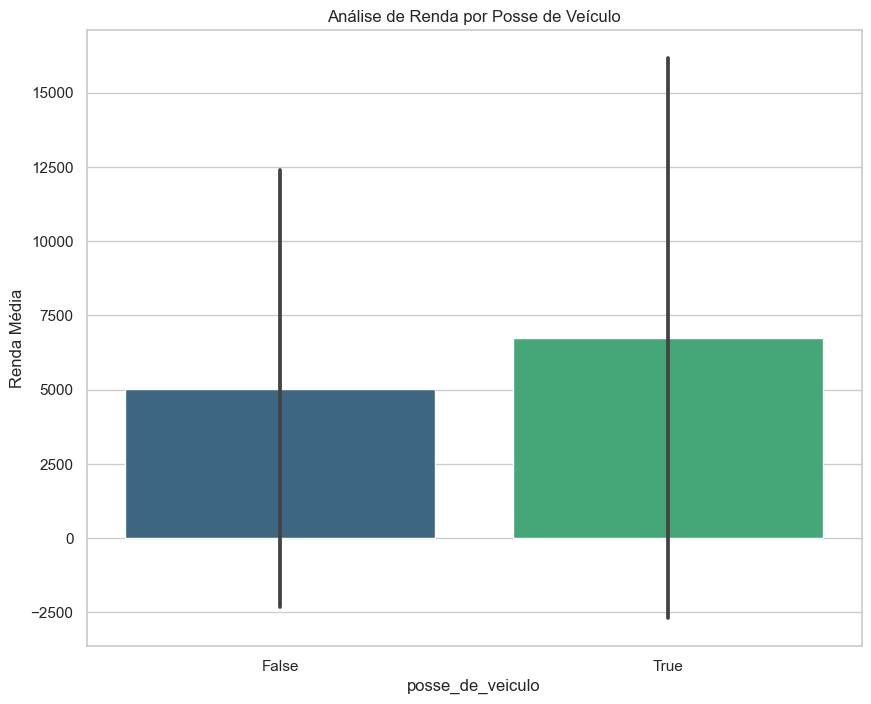

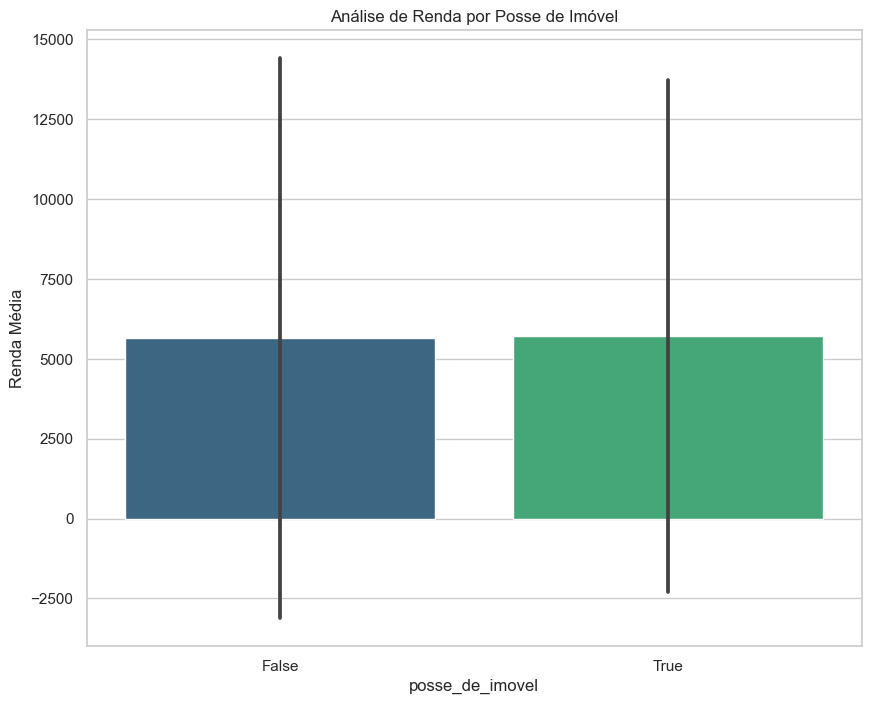

In [104]:
# Função para analisar e plotar a distribuição de variáveis categóricas
def analisar_variavel_categorica(dados, variavel, titulo):
    # Cria um gráfico de barras para a variável categórica em relação à renda
    plt.figure(figsize=(10, 8))
    sns.set(style="whitegrid")
    
    # Utiliza seaborn para gerar um barplot da variável categórica em relação à renda
    sns.barplot(x=variavel, y='renda', data=dados, ci='sd', palette='viridis')
    
    # Adiciona título ao gráfico
    plt.title(titulo)
    
    # Ajusta rótulos dos eixos
    plt.xlabel(variavel)
    plt.ylabel('Renda Média')
    
    # Exibe o gráfico
    plt.show()

# Análise categórica para 'posse_de_veiculo'
analisar_variavel_categorica(dados, 'posse_de_veiculo', 'Análise de Renda por Posse de Veículo')

# Análise categórica para 'posse_de_imovel'
analisar_variavel_categorica(dados, 'posse_de_imovel', 'Análise de Renda por Posse de Imóvel')

- Nenhuma das variáveis parece ser uma boa preditora/discriminalizadora de renda de forma estatisticamente significante.

# Atividade 03

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

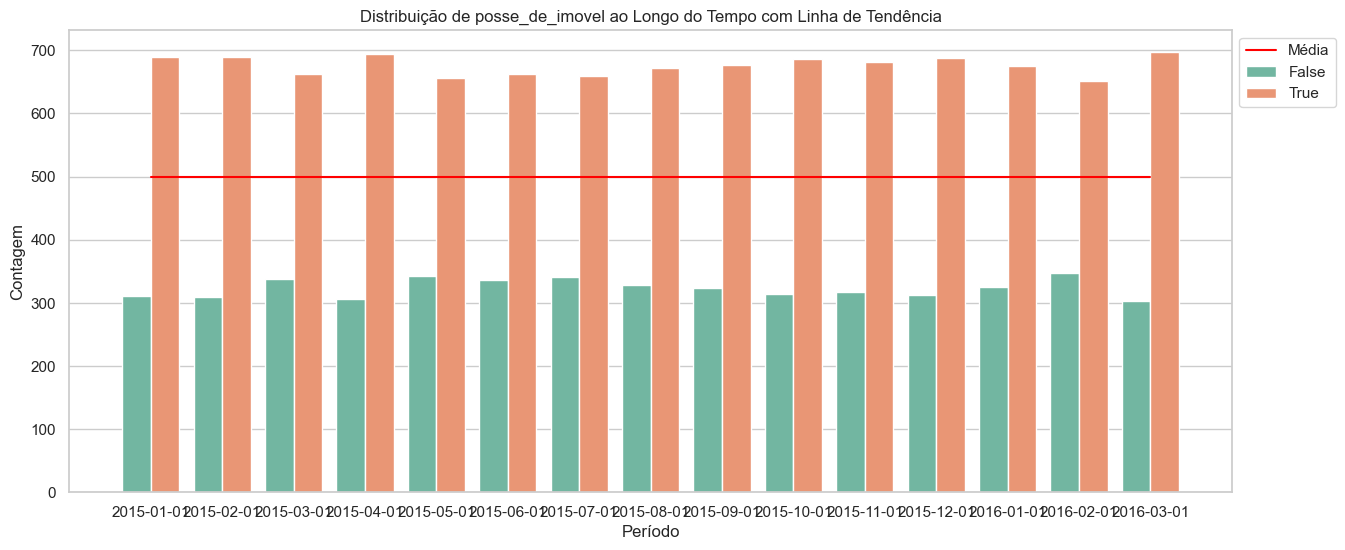

In [106]:
# Convertendo a variável 'posse_de_imovel' para o tipo categórico
dados['posse_de_imovel'] = dados['posse_de_imovel'].astype(str).astype('category')

# Função corrigida para plotar a distribuição de uma variável categórica ao longo do tempo
def plotar_distribuicao_temporal(dados, variavel_categorica):
    # Cria um gráfico de barras para a variável categórica ao longo do tempo
    plt.figure(figsize=(15, 6))
    sns.set(style="whitegrid")
    
    # Utiliza seaborn para gerar um countplot da variável categórica ao longo do tempo
    sns.countplot(data=dados, x='data_ref', hue=variavel_categorica, dodge=True, palette='Set2')
    
    # Calcula a média da variável categórica por período
    media_por_periodo = dados.groupby('data_ref')[variavel_categorica].value_counts().unstack().mean(axis=1)
    
    # Adiciona linha de tendência (média) ao gráfico
    sns.lineplot(x=media_por_periodo.index, y=media_por_periodo.values, color='red', label='Média')
    
    # Adiciona título ao gráfico
    plt.title(f'Distribuição de {variavel_categorica} ao Longo do Tempo com Linha de Tendência')
    
    # Ajusta rótulos dos eixos
    plt.xlabel('Período')
    plt.ylabel('Contagem')
    
    # Exibe a legenda fora do gráfico para melhor visibilidade
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Exibe o gráfico
    plt.show()

# Distribuição de 'posse_de_imovel' ao longo do tempo com linha de tendência
plotar_distribuicao_temporal(dados, 'posse_de_imovel')

- não parece haver alterações significativas na distribuição da posse de imóvel ao longo do tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

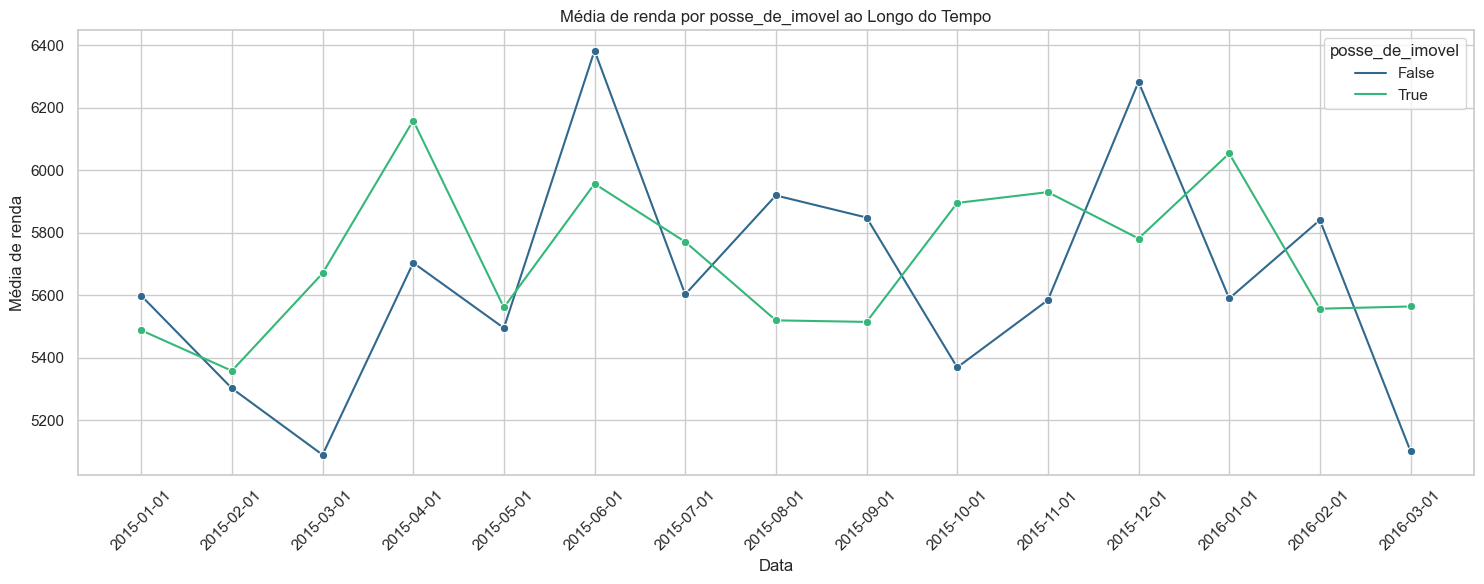

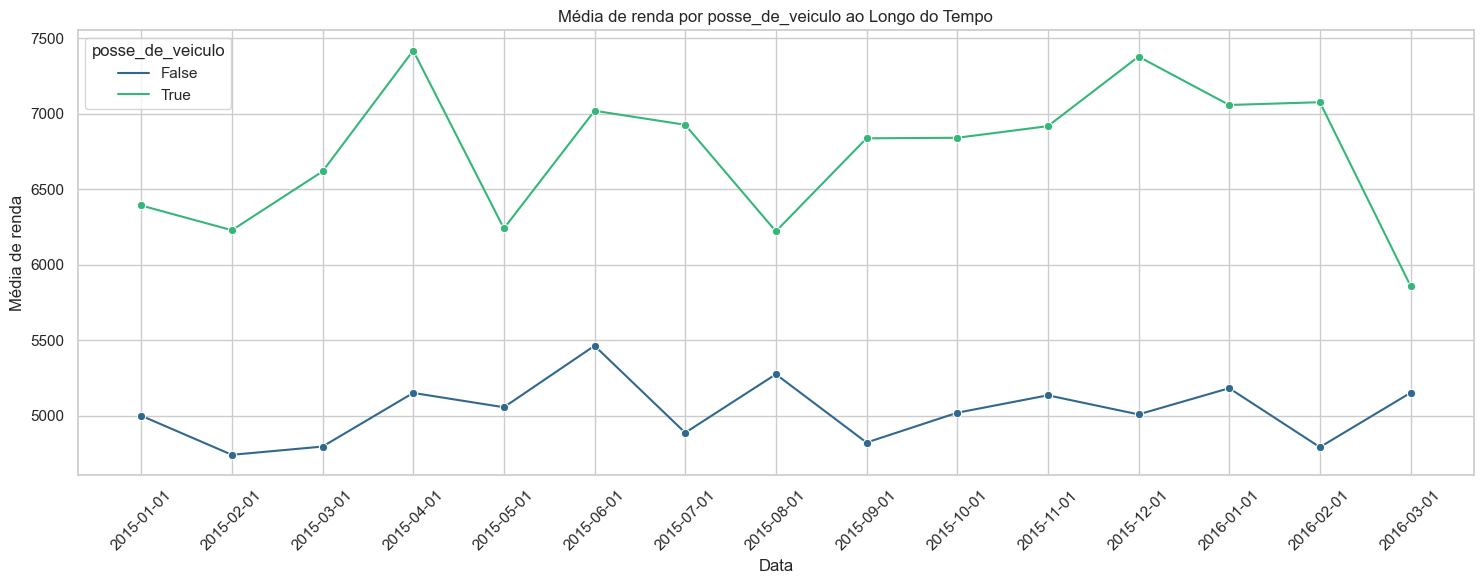

In [109]:
# Função para plotar a média de variáveis qualitativas ao longo do tempo
def plotar_media_ao_longo_do_tempo(dados, variaveis_qualitativas, variavel_numerica, coluna_data):
    for var_qualitativa in variaveis_qualitativas:
        # Agrupa os dados por data, variável qualitativa e calcula a média da variável numérica
        dados_agrupados = dados.groupby([coluna_data, var_qualitativa])[variavel_numerica].mean().reset_index()
        
        # Cria um gráfico de linha para a média ao longo do tempo
        plt.figure(figsize=(15, 6))
        sns.set(style="whitegrid")
        
        # Utiliza seaborn para gerar um lineplot da média ao longo do tempo
        sns.lineplot(x=coluna_data, y=variavel_numerica, hue=var_qualitativa, data=dados_agrupados, marker='o', palette='viridis')
        
        # Adiciona título e rótulos aos eixos
        plt.title(f'Média de {variavel_numerica} por {var_qualitativa} ao Longo do Tempo')
        plt.xlabel('Data')
        plt.ylabel(f'Média de {variavel_numerica}')
        
        # Adiciona legenda
        plt.legend(title=var_qualitativa)
        
        # Rotaciona os rótulos do eixo x para melhor visualização
        plt.xticks(rotation=45)
        
        # Ajusta o layout
        plt.tight_layout()
        
        # Exibe o gráfico
        plt.show()

# Plota média de 'renda' para cada nível de 'posse_de_imovel' e 'posse_de_veiculo' ao longo do tempo
plotar_media_ao_longo_do_tempo(dados, ['posse_de_imovel', 'posse_de_veiculo'], 'renda', 'data_ref')

- Não, não houve nenhuma alteração importante nos gráficos. As médias de renda por posse de imóvel e veículo se mantiveram estáveis ao longo do tempo, sem mostrar uma tendência clara ou uma mudança brusca.
- Sim, eu acho que se pode utilizar essas variáveis em uma modelagem, mas é preciso fazer uma análise mais aprofundada para confirmar sua utilidade. 